In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
import logging
import os
import warnings

import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub

from datetime import datetime
from keras.preprocessing import image
from PIL import Image
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from tensorflow.keras import layers

# from utils import *

warnings.filterwarnings('ignore')
logging.getLogger("tensorflow").setLevel(logging.ERROR)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
import tensorflow as tf
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPool2D, UpSampling2D, GlobalMaxPool2D, GlobalAveragePooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.layers import Dense, Dropout, Activation, Reshape, Flatten, Input
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical, plot_model

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import NASNetMobile, Xception, DenseNet121, MobileNetV2, InceptionV3, InceptionResNetV2, vgg16, resnet50, inception_v3, xception, DenseNet201
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import sklearn
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import jaccard_score

from scipy import stats

import seaborn as sns

import skimage
from skimage.transform import rotate

from tqdm import tqdm
from datetime import datetime

import numpy as np
import os
import cv2
import pandas as pd
# import imutils
import random
from PIL import Image
import matplotlib.pyplot as plt

import pickle
import torch

In [ ]:
#!pip install kaggle

In [ ]:
import kaggle

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
#od.download("https://www.kaggle.com/c/super-ai-engineer-2021-thai-food-labeling/data?select=hackathon.zipfile")

In [ ]:
#import kaggle

In [ ]:
!kaggle competitions download -c super-ai-engineer-2021-properties-tagging

100% 4.04G/4.05G [01:18<00:00, 59.2MB/s]
100% 4.05G/4.05G [01:18<00:00, 55.6MB/s]


In [ ]:
#!kaggle competitions download -c super-ai-engineer-2021-thai-food-labeling

100% 6.42G/6.43G [00:45<00:00, 149MB/s]
100% 6.43G/6.43G [00:45<00:00, 151MB/s]


In [ ]:
!kaggle competitions download -c super-ai-engineer-2021-house-grade-classification

100% 2.31G/2.31G [00:29<00:00, 88.5MB/s]
100% 2.31G/2.31G [00:29<00:00, 83.6MB/s]


In [ ]:
!unzip /content/house/super-ai-engineer-2021-house-grade-classification.zip -d /content/house/

Archive:  /content/house/super-ai-engineer-2021-house-grade-classification.zip
  inflating: /content/house/grade.csv  
  inflating: /content/house/sample_submission.csv  
  inflating: /content/house/test.zipfile  
  inflating: /content/house/test/004c4789.jpg  
  inflating: /content/house/test/00e2bfe0.jpg  
  inflating: /content/house/test/01265567.jpg  
  inflating: /content/house/test/0188f57d.jpg  
  inflating: /content/house/test/01945b53.jpg  
  inflating: /content/house/test/01ccbb76.jpg  
  inflating: /content/house/test/0272a96c.jpg  
  inflating: /content/house/test/034c3c52.jpg  
  inflating: /content/house/test/03df66ca.jpg  
  inflating: /content/house/test/04dd10ad.jpg  
  inflating: /content/house/test/05a12031.jpg  
  inflating: /content/house/test/05f824ae.jpg  
  inflating: /content/house/test/06683f95.jpg  
  inflating: /content/house/test/06e9b35d.jpg  
  inflating: /content/house/test/07a3abdf.jpg  
  inflating: /content/house/test/0812bf3e.jpg  
  inflating: /cont

In [ ]:
!unzip /content/super-ai-engineer-2021-properties-tagging.zip

Streaming output truncated to the last 5000 lines.
  inflating: extra/img_13-7376641365172_100-561545971402_s90_f90_y0_1_09-2020.jpg  
  inflating: extra/img_13-7377315062526_100-559460968232_s270_f90_y0_1_03-2021.jpg  
  inflating: extra/img_13-7377315062526_100-559460968232_s90_f90_y0_1_03-2021.jpg  
  inflating: extra/img_13-7377530416811_100-561562662245_s270_f90_y0_1_09-2020.jpg  
  inflating: extra/img_13-7377530416811_100-561562662245_s90_f90_y0_1_09-2020.jpg  
  inflating: extra/img_13-7377896366311_100-561453030533_s270_f90_y0_1_09-2020.jpg  
  inflating: extra/img_13-7377896366311_100-561453030533_s90_f90_y0_1_09-2020.jpg  
  inflating: extra/img_13-7378416613642_100-561580866435_s270_f90_y0_1_09-2020.jpg  
  inflating: extra/img_13-7378416613642_100-561580866435_s90_f90_y0_1_09-2020.jpg  
  inflating: extra/img_13-7379302541347_100-561599213289_s90_f90_y0_1_09-2020.jpg  
  inflating: extra/img_13-7380330631074_100-558840188918_s270_f90_y0_1_08-2020.jpg  
  inflating: extra/i

In [ ]:
!unzip /content/hackathon.zipfile

In [ ]:
from os import listdir

In [ ]:
df = pd.read_csv("/content/house/train.csv")
df.insert(loc=1, column="path", value=list(df['image_name'].apply(lambda x: "/content/house/train/" + x)))
df = df.rename(columns={"image_name":"filename", "class": "labels"})
df

,filename,path,labels
0,ChokChai4_img_13-7956791_100-6031267_a187-2159...,/content/house/train/ChokChai4_img_13-7956791_...,0
1,ChokChai4_img_13-7961753_100-6031881_a185-9785...,/content/house/train/ChokChai4_img_13-7961753_...,0
2,ChokChai4_img_13-7969811_100-5906061_a180-5812...,/content/house/train/ChokChai4_img_13-7969811_...,0
3,ChokChai4_img_13-7970811_100-5906071_a180-5812...,/content/house/train/ChokChai4_img_13-7970811_...,0
4,ChokChai4_img_13-7971811_100-5906081_a180-5812...,/content/house/train/ChokChai4_img_13-7971811_...,0
...,...,...,...
2948,MrtSutthisan_img_13-7986837_100-5730268_a260_s...,/content/house/train/MrtSutthisan_img_13-79868...,5
2949,MrtSutthisan_img_13-7990804_100-5729745_a170_s...,/content/house/train/MrtSutthisan_img_13-79908...,5
2950,MrtSutthisan_img_13-7991266_100-5728237_a255_s...,/content/house/train/MrtSutthisan_img_13-79912...,5
2951,MrtSutthisan_img_13-7992342_100-5710656_a55_s9...,/content/house/train/MrtSutthisan_img_13-79923...,5


In [ ]:
df_ex = pd.read_csv("/content/extra.csv")
df_ex
df_ex.insert(loc=1, column="path", value=list(df_ex['filename'].apply(lambda x: "/content/extra/" + x)))
df_ex

,filename,path,labels
0,MrtSutthisan_img_13-7802206_100-5717337_a257_s...,/content/extra/MrtSutthisan_img_13-7802206_100...,0
1,MrtSutthisan_img_13-7802824_100-5717195_a3_s90...,/content/extra/MrtSutthisan_img_13-7802824_100...,0
2,MrtSutthisan_img_13-7803048_100-5713201_a183_s...,/content/extra/MrtSutthisan_img_13-7803048_100...,0
3,MrtSutthisan_img_13-7813255_100-5697035_a183_s...,/content/extra/MrtSutthisan_img_13-7813255_100...,0
4,MrtSutthisan_img_13-7813311_100-5696037_a183_s...,/content/extra/MrtSutthisan_img_13-7813311_100...,3
...,...,...,...
5883,img_13-7643371_100-539753_a30-82040882_s300-82...,/content/extra/img_13-7643371_100-539753_a30-8...,3
5884,img_13-7667727_100-5356214_a25-41138042_s115-4...,/content/extra/img_13-7667727_100-5356214_a25-...,0
5885,img_13-7667727_100-5356214_a25-41138042_s295-4...,/content/extra/img_13-7667727_100-5356214_a25-...,3
5886,img_13-7670169_100-5357421_a25-40547316_s115-4...,/content/extra/img_13-7670169_100-5357421_a25-...,2 3


In [ ]:
df_concat = pd.concat([df, df_ex], axis=0)
df_concat

,filename,path,labels
0,ChokChai4_img_13-7956791_100-6031267_a187-2159...,/content/house/train/ChokChai4_img_13-7956791_...,0
1,ChokChai4_img_13-7961753_100-6031881_a185-9785...,/content/house/train/ChokChai4_img_13-7961753_...,0
2,ChokChai4_img_13-7969811_100-5906061_a180-5812...,/content/house/train/ChokChai4_img_13-7969811_...,0
3,ChokChai4_img_13-7970811_100-5906071_a180-5812...,/content/house/train/ChokChai4_img_13-7970811_...,0
4,ChokChai4_img_13-7971811_100-5906081_a180-5812...,/content/house/train/ChokChai4_img_13-7971811_...,0
...,...,...,...
5883,img_13-7643371_100-539753_a30-82040882_s300-82...,/content/extra/img_13-7643371_100-539753_a30-8...,3
5884,img_13-7667727_100-5356214_a25-41138042_s115-4...,/content/extra/img_13-7667727_100-5356214_a25-...,0
5885,img_13-7667727_100-5356214_a25-41138042_s295-4...,/content/extra/img_13-7667727_100-5356214_a25-...,3
5886,img_13-7670169_100-5357421_a25-40547316_s115-4...,/content/extra/img_13-7670169_100-5357421_a25-...,2 3


In [ ]:
#path = "/content/properties-tagging/extra/"

In [ ]:
df_concat['labels'] = df_concat['labels'].apply(lambda x:str(x))

In [ ]:
df_concat_dummies = df_concat['labels'].str.get_dummies(sep=' ')
df_concat_dummies

,0,1,2,3,4,5
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
5883,0,0,0,1,0,0
5884,1,0,0,0,0,0
5885,0,0,0,1,0,0
5886,0,0,1,1,0,0


In [ ]:
df_concat.head(5)

,filename,path,labels
0,ChokChai4_img_13-7956791_100-6031267_a187-2159...,/content/house/train/ChokChai4_img_13-7956791_...,0
1,ChokChai4_img_13-7961753_100-6031881_a185-9785...,/content/house/train/ChokChai4_img_13-7961753_...,0
2,ChokChai4_img_13-7969811_100-5906061_a180-5812...,/content/house/train/ChokChai4_img_13-7969811_...,0
3,ChokChai4_img_13-7970811_100-5906071_a180-5812...,/content/house/train/ChokChai4_img_13-7970811_...,0
4,ChokChai4_img_13-7971811_100-5906081_a180-5812...,/content/house/train/ChokChai4_img_13-7971811_...,0


In [ ]:
df = pd.concat([df_concat, df_concat_dummies], axis=1)
df

,filename,path,labels,0,1,2,3,4,5
0,ChokChai4_img_13-7956791_100-6031267_a187-2159...,/content/house/train/ChokChai4_img_13-7956791_...,0,1,0,0,0,0,0
1,ChokChai4_img_13-7961753_100-6031881_a185-9785...,/content/house/train/ChokChai4_img_13-7961753_...,0,1,0,0,0,0,0
2,ChokChai4_img_13-7969811_100-5906061_a180-5812...,/content/house/train/ChokChai4_img_13-7969811_...,0,1,0,0,0,0,0
3,ChokChai4_img_13-7970811_100-5906071_a180-5812...,/content/house/train/ChokChai4_img_13-7970811_...,0,1,0,0,0,0,0
4,ChokChai4_img_13-7971811_100-5906081_a180-5812...,/content/house/train/ChokChai4_img_13-7971811_...,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
5883,img_13-7643371_100-539753_a30-82040882_s300-82...,/content/extra/img_13-7643371_100-539753_a30-8...,3,0,0,0,1,0,0
5884,img_13-7667727_100-5356214_a25-41138042_s115-4...,/content/extra/img_13-7667727_100-5356214_a25-...,0,1,0,0,0,0,0
5885,img_13-7667727_100-5356214_a25-41138042_s295-4...,/content/extra/img_13-7667727_100-5356214_a25-...,3,0,0,0,1,0,0
5886,img_13-7670169_100-5357421_a25-40547316_s115-4...,/content/extra/img_13-7670169_100-5357421_a25-...,2 3,0,0,1,1,0,0


In [ ]:
df = df.reset_index()
df

,index,filename,path,labels,0,1,2,3,4,5
0,0,ChokChai4_img_13-7956791_100-6031267_a187-2159...,/content/house/train/ChokChai4_img_13-7956791_...,0,1,0,0,0,0,0
1,1,ChokChai4_img_13-7961753_100-6031881_a185-9785...,/content/house/train/ChokChai4_img_13-7961753_...,0,1,0,0,0,0,0
2,2,ChokChai4_img_13-7969811_100-5906061_a180-5812...,/content/house/train/ChokChai4_img_13-7969811_...,0,1,0,0,0,0,0
3,3,ChokChai4_img_13-7970811_100-5906071_a180-5812...,/content/house/train/ChokChai4_img_13-7970811_...,0,1,0,0,0,0,0
4,4,ChokChai4_img_13-7971811_100-5906081_a180-5812...,/content/house/train/ChokChai4_img_13-7971811_...,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8836,5883,img_13-7643371_100-539753_a30-82040882_s300-82...,/content/extra/img_13-7643371_100-539753_a30-8...,3,0,0,0,1,0,0
8837,5884,img_13-7667727_100-5356214_a25-41138042_s115-4...,/content/extra/img_13-7667727_100-5356214_a25-...,0,1,0,0,0,0,0
8838,5885,img_13-7667727_100-5356214_a25-41138042_s295-4...,/content/extra/img_13-7667727_100-5356214_a25-...,3,0,0,0,1,0,0
8839,5886,img_13-7670169_100-5357421_a25-40547316_s115-4...,/content/extra/img_13-7670169_100-5357421_a25-...,2 3,0,0,1,1,0,0


In [ ]:
df = df.drop(['index'], axis=1)
df

,filename,path,labels,0,1,2,3,4,5
0,ChokChai4_img_13-7956791_100-6031267_a187-2159...,/content/house/train/ChokChai4_img_13-7956791_...,0,1,0,0,0,0,0
1,ChokChai4_img_13-7961753_100-6031881_a185-9785...,/content/house/train/ChokChai4_img_13-7961753_...,0,1,0,0,0,0,0
2,ChokChai4_img_13-7969811_100-5906061_a180-5812...,/content/house/train/ChokChai4_img_13-7969811_...,0,1,0,0,0,0,0
3,ChokChai4_img_13-7970811_100-5906071_a180-5812...,/content/house/train/ChokChai4_img_13-7970811_...,0,1,0,0,0,0,0
4,ChokChai4_img_13-7971811_100-5906081_a180-5812...,/content/house/train/ChokChai4_img_13-7971811_...,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
8836,img_13-7643371_100-539753_a30-82040882_s300-82...,/content/extra/img_13-7643371_100-539753_a30-8...,3,0,0,0,1,0,0
8837,img_13-7667727_100-5356214_a25-41138042_s115-4...,/content/extra/img_13-7667727_100-5356214_a25-...,0,1,0,0,0,0,0
8838,img_13-7667727_100-5356214_a25-41138042_s295-4...,/content/extra/img_13-7667727_100-5356214_a25-...,3,0,0,0,1,0,0
8839,img_13-7670169_100-5357421_a25-40547316_s115-4...,/content/extra/img_13-7670169_100-5357421_a25-...,2 3,0,0,1,1,0,0


In [ ]:
df.shape[0]

8841

In [ ]:
(df['path'][0][:21] == "/content/house/train/") == True

True

In [ ]:
from tqdm import tqdm

train_image = []

for i in tqdm(range(df.shape[0])):
    img = image.load_img(df.loc[i, 'path'], target_size=(128,128,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

X = np.array(train_image)

100%|██████████| 8841/8841 [01:58<00:00, 74.79it/s] 


In [ ]:
#from tqdm import tqdm
#
#train_image = []
#
#for i in tqdm(range(df.shape[0])):
#    if (df['path'][i][:21] == "/content/house/train/") == True:
#        img = image.load_img(df.loc[i, 'path'], target_size=(256,256,3))
#        img = image.img_to_array(img)
#        img = img/255
#        train_image.append(img)
#    else:
#      img = image.load_img(df.loc[i, 'path'], target_size=(256,256,3))
#        img = image.img_to_array(img)
#        img = img/255
#        train_image.append(img)
#
#X = np.array(train_image)

100%|██████████| 8264/8264 [01:48<00:00, 76.23it/s]


In [ ]:
X.shape

(8841, 128, 128, 3)

(-0.5, 127.5, 127.5, -0.5)

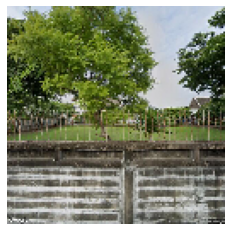

In [ ]:
plt.imshow(X[0])
plt.axis('off')

In [ ]:
y = np.array(df.drop(['filename', 'path', 'labels'],axis=1))
y.shape

(8841, 6)

In [ ]:
y[0]

array([1, 0, 0, 0, 0, 0])

In [ ]:
path_dir = "/content/"

In [ ]:
def save_dataset(Xs, ys):
    # Xs, ys = read_original_images()
    # Xs, ys = remove_duplicate(Xs)

    np.save(path_dir+"train/Xs224_V2.npy", X)
    np.save(path_dir+"train/ys_v2.npy", y)

In [ ]:
#!pwd

In [ ]:
#!mkdir /train/

In [ ]:
save_dataset(X,y)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
import logging
import os
import warnings

import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub

from datetime import datetime
from keras.preprocessing import image
from PIL import Image
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from tensorflow.keras import layers

# from utils import *

warnings.filterwarnings('ignore')
logging.getLogger("tensorflow").setLevel(logging.ERROR)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
import tensorflow as tf
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPool2D, UpSampling2D, GlobalMaxPool2D, GlobalAveragePooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.layers import Dense, Dropout, Activation, Reshape, Flatten, Input
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical, plot_model

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import NASNetMobile, Xception, DenseNet121, MobileNetV2, InceptionV3, InceptionResNetV2, vgg16, resnet50, inception_v3, xception, DenseNet201
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import sklearn
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import jaccard_score

from scipy import stats

import seaborn as sns

import skimage
from skimage.transform import rotate

from tqdm import tqdm
from datetime import datetime

import numpy as np
import os
import cv2
import pandas as pd
# import imutils
import random
from PIL import Image
import matplotlib.pyplot as plt

import pickle
import torch

In [ ]:
path_dir = "/content/"

In [ ]:
def load_dataset():
    return np.load(path_dir+"train/Xs224_V2.npy"), np.load(path_dir+"train/ys_v2.npy")

In [ ]:
XsV1, ysV1 = load_dataset()
XsV1.shape, ysV1.shape         

((8841, 128, 128, 3), (8841, 6))

In [ ]:
size = (128, 128)

In [ ]:
import tensorflow as tf

new_input = tf.keras.layers.Input(shape=(size[0],size[1], 3))
model     = tf.keras.applications.NASNetLarge(include_top=False, input_tensor=new_input, weights="imagenet", pooling='max')

outputs   = tf.keras.layers.Dense(6, activation='sigmoid')(model.output)
model     = tf.keras.Model(new_input, outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 63, 63, 96)   2592        ['input_1[0][0]']                
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 63, 63, 96)   384         ['stem_conv1[0][0]']             
                                                                                                  
 activation (Activation)        (None, 63, 63, 96)   0           ['stem_bn1[0][0]']           

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

random_state = 42
X_train, X_test, y_train, y_test = train_test_split(XsV1, ysV1, test_size=0.2, random_state=random_state,shuffle=True)

In [ ]:
X_train.shape,X_test.shape

((7072, 256, 256, 3), (1769, 256, 256, 3))

In [ ]:
y_train.shape      

(7072, 6)

In [ ]:
y_test.shape 

(1769, 6)

In [ ]:
#y_trainc = tf.keras.utils.to_categorical(y_train, num_classes=301)
#y_testc  = tf.keras.utils.to_categorical(y_test, num_classes=301)

In [ ]:
#y_trainc.shape

In [ ]:
#y_testc.shape

In [ ]:
#from tensorflow.keras.utils import to_categorical
#y_traincc = to_categorical(y_train,2)
#y_testcc = to_categorical(y_testc, 2)

In [ ]:
#y_traincc.shape

In [ ]:
#y_testcc.shape

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/machima/Nasnet_save_v1.h5",monitor='val_loss', verbose=0, save_best_only=True,mode='min'),
]
model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    x=X_train, y=y_train, epochs=100, batch_size=16, callbacks=callbacks, validation_data=(X_test, y_test)
)

Epoch 1/100
442/442 [==============================] - 394s 803ms/step - loss: 0.3737 - accuracy: 0.5387 - val_loss: 502674259968.0000 - val_accuracy: 0.5534
Epoch 2/100
442/442 [==============================] - 350s 793ms/step - loss: 0.3294 - accuracy: 0.5888 - val_loss: 1541875712.0000 - val_accuracy: 0.5534
Epoch 3/100
442/442 [==============================] - 327s 740ms/step - loss: 0.3166 - accuracy: 0.6048 - val_loss: 1636979310592.0000 - val_accuracy: 0.5534
Epoch 4/100
247/442 [===============>..............] - ETA: 2:16 - loss: 0.3326 - accuracy: 0.5832

KeyboardInterrupt: ignored

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/machima/Nasnet_save_v1.h5')

In [ ]:
submis = pd.read_csv("/content/submission.csv")
submis

,filename,labels
0,011958.png,93 95 229
1,011959.png,35 121 222 256
2,011960.png,121 132 256
3,011963.png,NaN
4,011964.png,NaN
...,...,...
3995,016604.png,NaN
3996,016605.png,NaN
3997,016606.png,NaN
3998,016607.png,NaN


In [ ]:
submis.shape[0]

4000

In [ ]:
submis_image = [] 
for i in range(submis.shape[0]): 
  img = image.load_img('/content/hackathon/'+submis['filename'][i],target_size=(256,256,3)) 
  img = image.img_to_array(img) 
  img = img/255 
  submis_image.append(img)

In [ ]:
X_pred = np.array(submis_image)
X_pred.shape

(4000, 256, 256, 3)

In [ ]:
df

,filename,path,labels,0,1,10,100,101,102,103,...,90,91,92,93,94,95,96,97,98,99
0,000000.png,/content/hackathon/000000.png,139,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000001.png,/content/hackathon/000001.png,223 253 256,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,000002.png,/content/hackathon/000002.png,121 127 246,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000003.png,/content/hackathon/000003.png,81 282,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000004.png,/content/hackathon/000004.png,2 144 145 205 221 256,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8259,009617.png,/content/hackathon/009617.png,35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8260,009618.png,/content/hackathon/009618.png,62 184,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8261,009619.png,/content/hackathon/009619.png,95 238 268,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8262,009620.png,/content/hackathon/009620.png,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop(['path'], axis=1, inplace=True)
df

,filename,labels,0,1,10,100,101,102,103,104,...,90,91,92,93,94,95,96,97,98,99
0,000000.png,139,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000001.png,223 253 256,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,000002.png,121 127 246,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000003.png,81 282,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000004.png,2 144 145 205 221 256,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8259,009617.png,35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8260,009618.png,62 184,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8261,009619.png,95 238 268,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8262,009620.png,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
classes = np.array(df.columns[2:])
proba = model.predict(X_pred)
proba.shape

(4000, 301)

In [ ]:
list_result = []
for k in range(len(proba)):
  top_5 = np.argsort(proba[k])[:-6:-1]
  list_x = []
  for i in range(5):
    #print("{}".format(classes[top_5[i]])+" ({:.3})".format(proba[0][top_5[i]]))
    if (proba[k][top_5[i]]) < 0.01:
      break
    list_x.append(classes[top_5[i]])
  if len(list_x) == 0:
    list_x.append(classes[top_5[0]])
  list_result.append(" ".join(list_x))
#plt.imshow(img_pred)
#print(top_5[:i])
#print(list_x)

In [ ]:
df_result = pd.DataFrame(list_result, columns = ["predict"])

In [ ]:
submis["labels"]= df_result["predict"]

In [ ]:
submis.to_csv("nasnetlarge100epochs001.csv", index = False)

In [ ]:
#from os import listdir
#import pandas as pd
#from skimage import io, transform

# **Skip**

In [ ]:
df['labels'][1].replace(' ', ",")

'223,253,256'

In [ ]:
def hopethai(dff):
  
  athit = []
  i = 0
  
  for i in range(0, 8263):
     j = dff['labels'][i].replace(' ', ",")
     athit.append(j)
     i += 1
  return athit
#print(hope(e)[0:6])

In [ ]:
hope = hopethai(df)
hope

In [ ]:
#a = df['labels'].tolist()
#a

In [ ]:
dfdf = pd.DataFrame([hope]).transpose()
dfdf

,0
0,139
1,"223,253,256"
2,"121,127,246"
3,"81,282"
4,"221,2,144,145,205,256"
...,...
8258,0
8259,0
8260,"62,184"
8261,"95,238,268"


In [ ]:
df_dummies = dfdf[0].str.get_dummies(sep=',')
df_dummies.tail(5)

,0,1,10,100,101,102,103,104,105,106,...,90,91,92,93,94,95,96,97,98,99
8258,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8259,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8262,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1 = pd.read_csv("/content/super-ai-engineer-2021-thai-food-labeling/labels.csv")
df1

,id,label
0,0,ไม่มี
1,1,กรอบ
2,2,กระดูก
3,3,กระดูกอ่อน
4,4,กระทา
...,...,...
297,297,ไตปลา
298,298,ไส้
299,299,ไส้กรอก
300,300,ไส้อั่ว


In [ ]:
df1['label']

0           ไม่มี
1            กรอบ
2          กระดูก
3      กระดูกอ่อน
4           กระทา
          ...    
297         ไตปลา
298           ไส้
299       ไส้กรอก
300       ไส้อั่ว
301       ไอศกรีม
Name: label, Length: 302, dtype: object

In [ ]:
df["path"] = "/content/hackathon/" + df["filename"]
from skimage import io, transform

size   = (480, 640)
images = []
labels = []
i = 0
for path in df["path"]:
    img = io.imread(path)
    img = transform.resize(img, size )
    images.append(img)
    i+= 1
    if i % 100==0:
        print(i)
    #io.imshow(img)
    #io.show()
    #break
    

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300


In [ ]:
df = pd.DataFrame({})
for path in os.listdir('/content/hackathon'):
  df = df.append({'Class': path}, ignore_index=True)
df